In [2]:
import os
import numpy as numpy
import mne
import matplotlib.pyplot as plt

path = os.getenv('HOME') + '/sgoinfre'

#move fist
subject = 1
runs = [3, 7, 11]

files_name = mne.datasets.eegbci.load_data(subject=subject, runs=runs ,path=path)
# print(files_name)


<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
Using matplotlib as 2D backend.


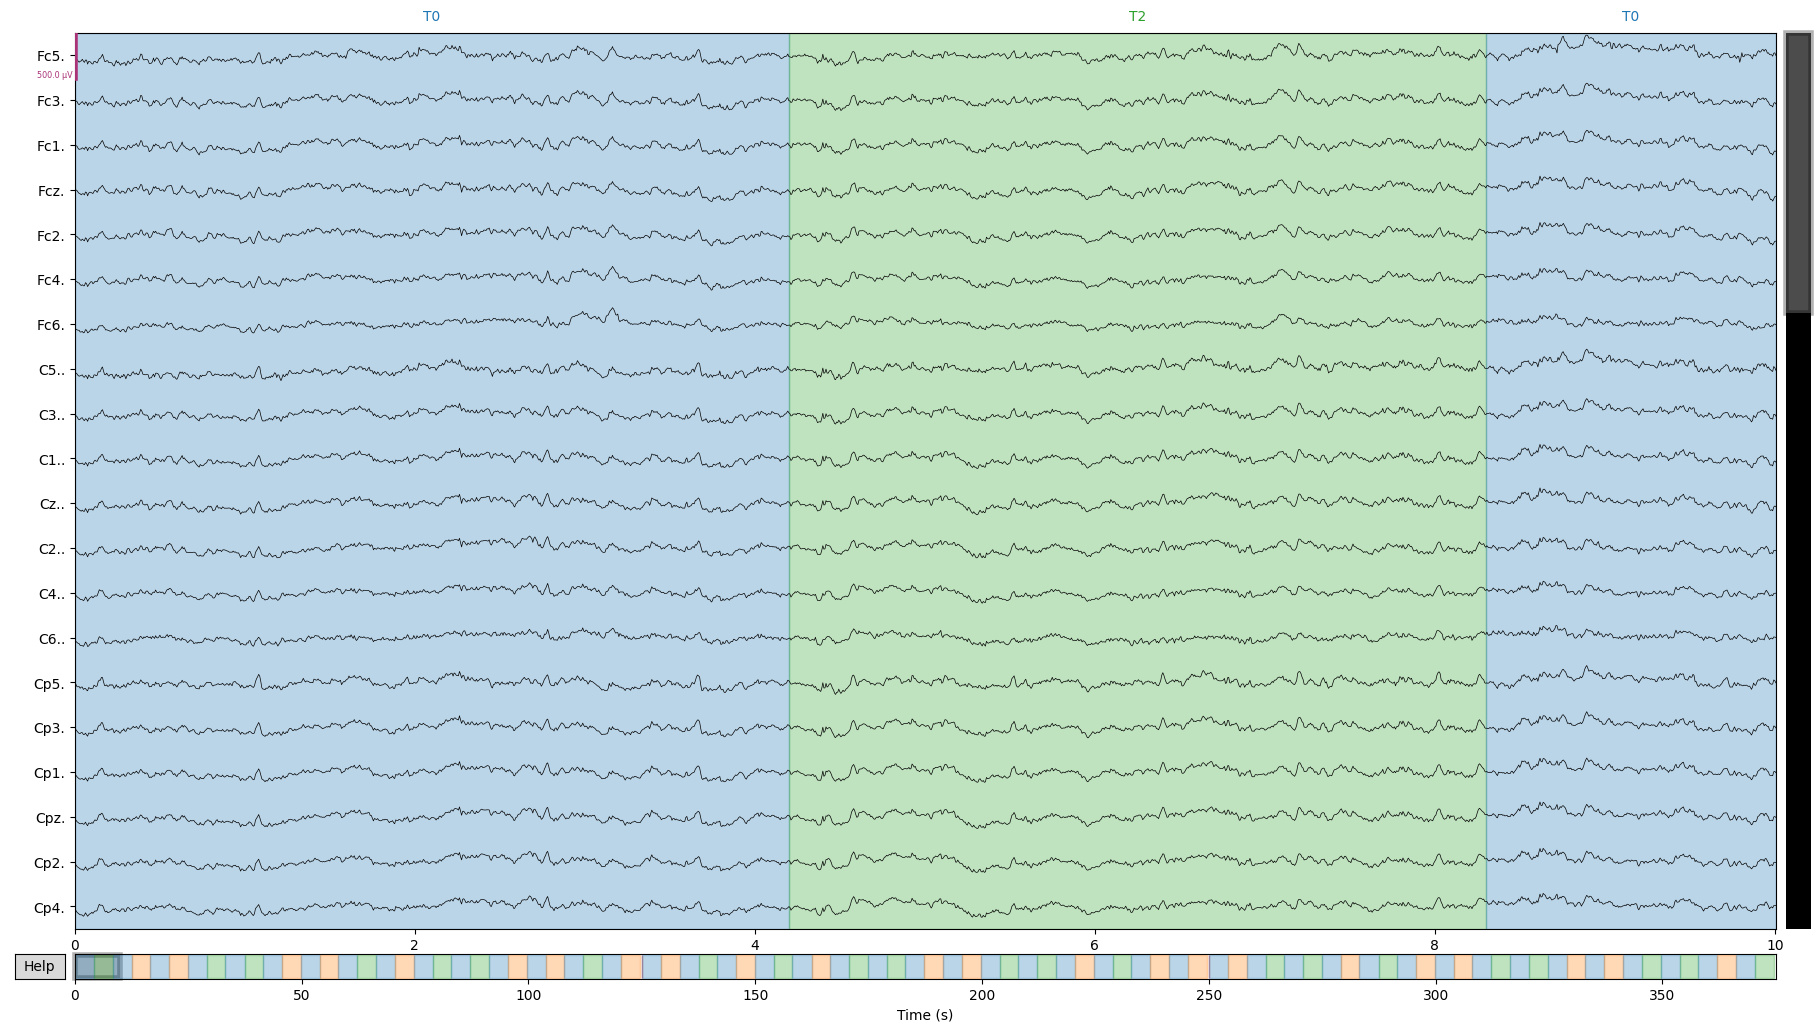

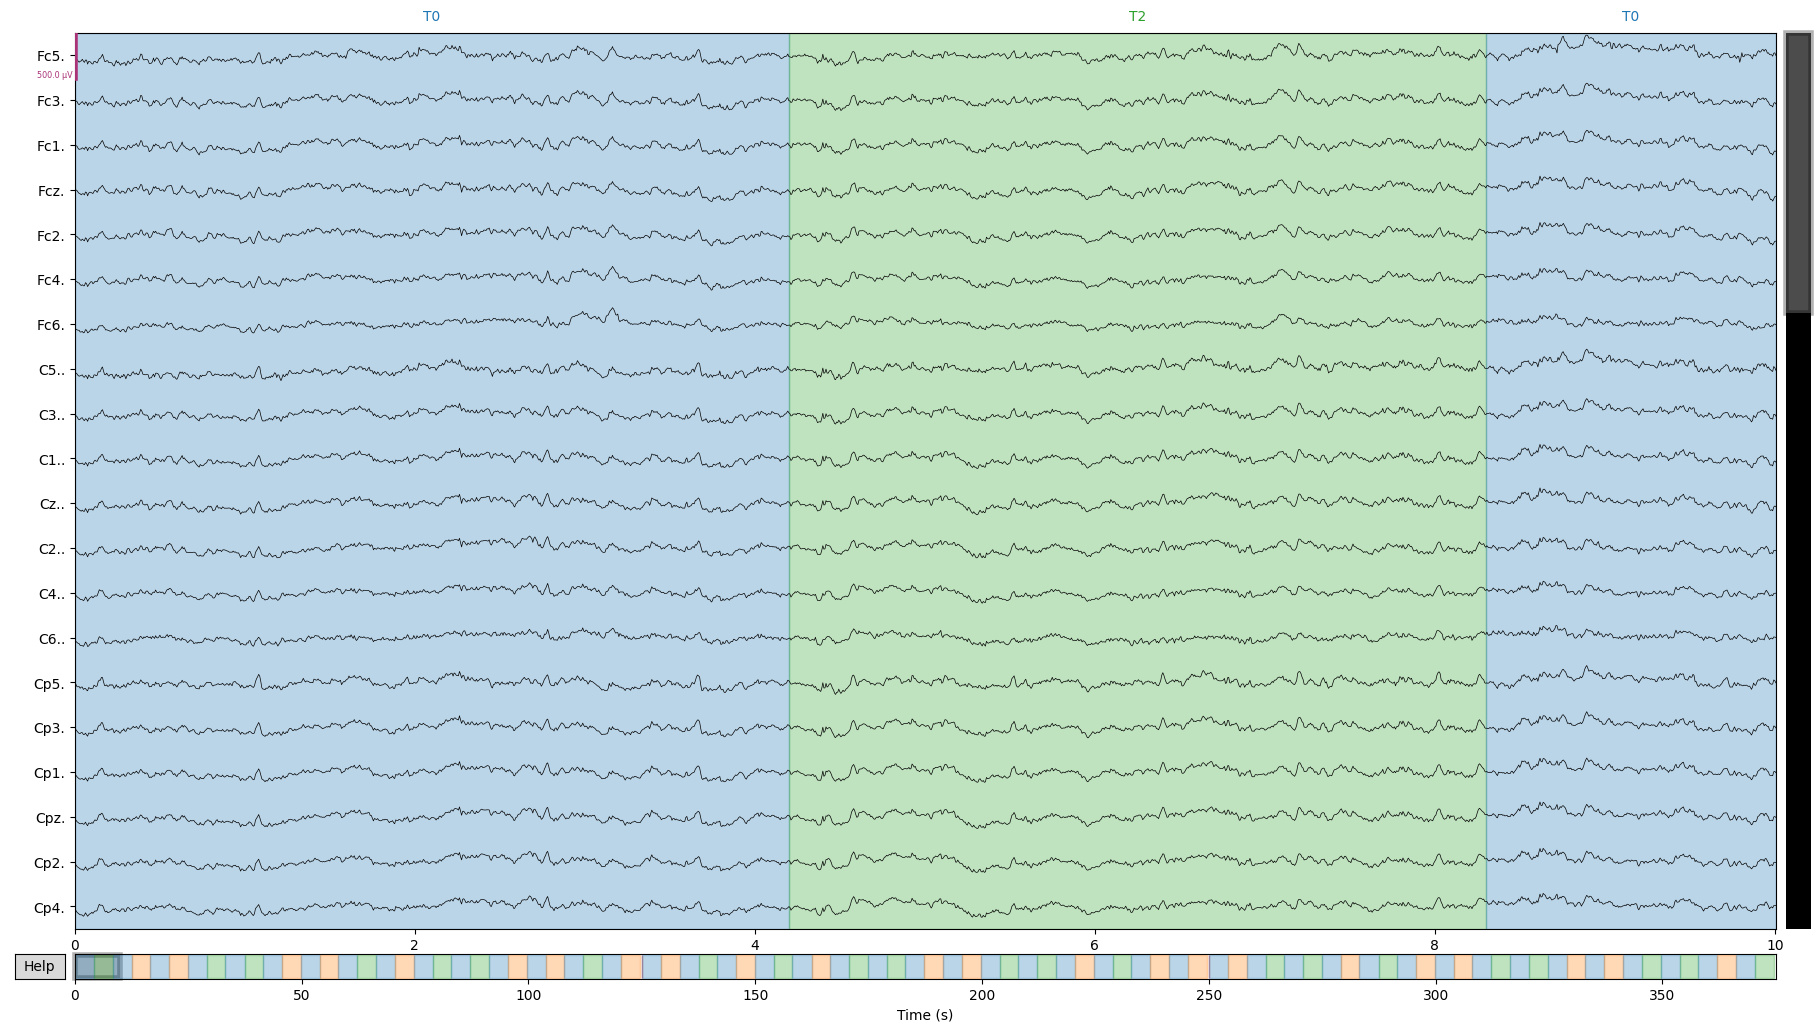

In [3]:
# 
raw = mne.io.concatenate_raws([mne.io.read_raw_edf(f, preload=True, verbose=False) for f in files_name])
print(raw.info)
sfreq = raw.info['sfreq']
raw.plot(scalings=dict(eeg=250e-6), title='Before traitement')

In [4]:
events, event_id = mne.events_from_annotations(raw, event_id=dict(T1=1, T2=2))
# events, event_id = mne.events_from_annotations(raw, event_id=dict(T0=0, T1=1, T2=2), verbose=True)
print(events.shape)
print(event_id.items())

Used Annotations descriptions: ['T1', 'T2']
(45, 3)
dict_items([('T1', 1), ('T2', 2)])


In [5]:
annotations = mne.annotations_from_events(events=events, sfreq=sfreq, event_desc={0: "rest", 1: "left fist", 2:"right fist"}, verbose=True)
print(annotations)

<Annotations | 45 segments: left fist (23), right fist (22)>


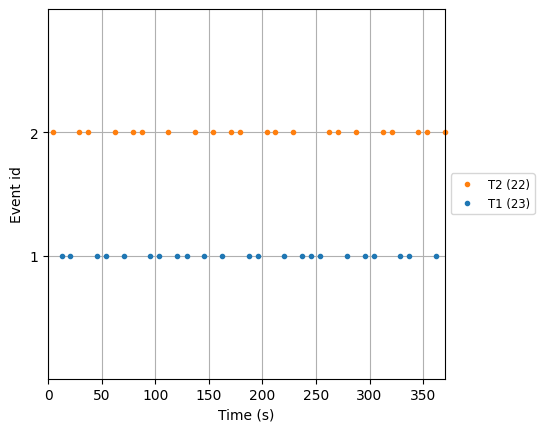

In [6]:
fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp, event_id=event_id)
fig.subplots_adjust(right= 0.8)

In [7]:
raw = raw.set_annotations(annotations=annotations)

In [8]:
raw.filter( l_freq=8, h_freq=30)
mne.datasets.eegbci.standardize(raw=raw)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished


['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']


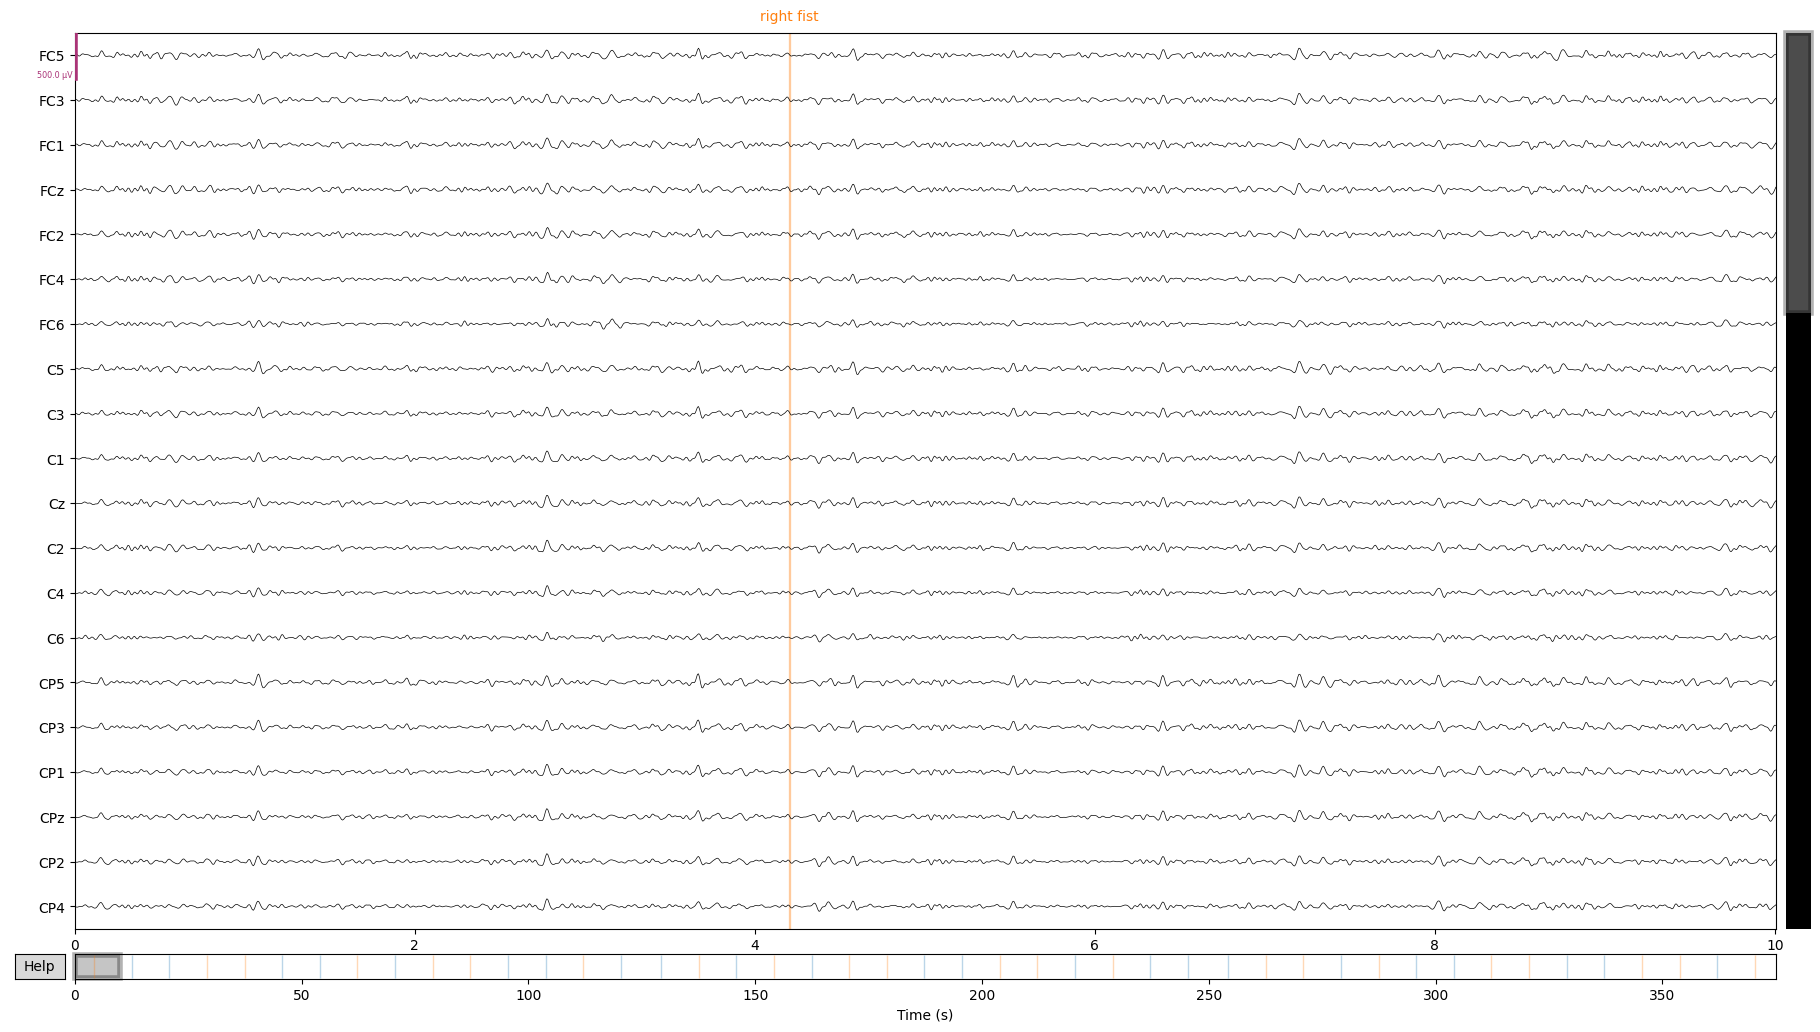

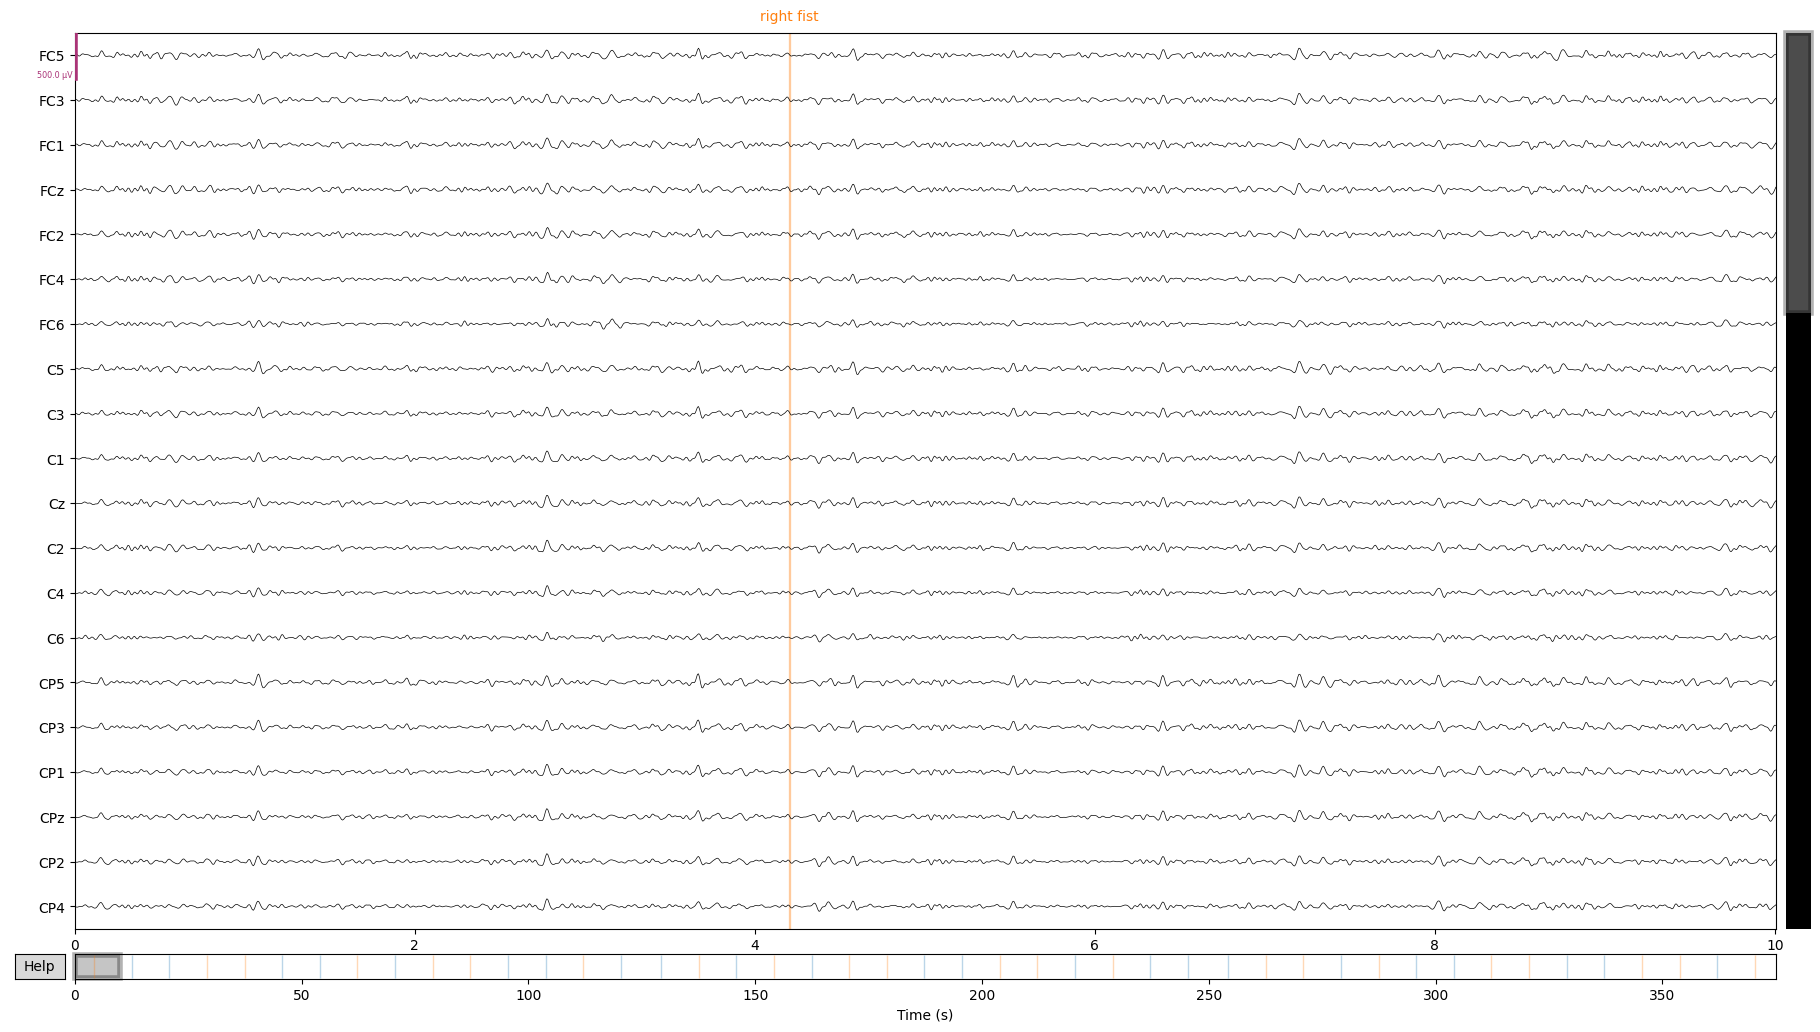

In [9]:
montage = mne.channels.make_standard_montage("biosemi64")
print(montage.ch_names)
raw.set_montage(montage, on_missing='ignore')
raw.plot(scalings=dict(eeg=250e-6))

Effective window size : 1.600 (s)


/home/clorin/.local/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


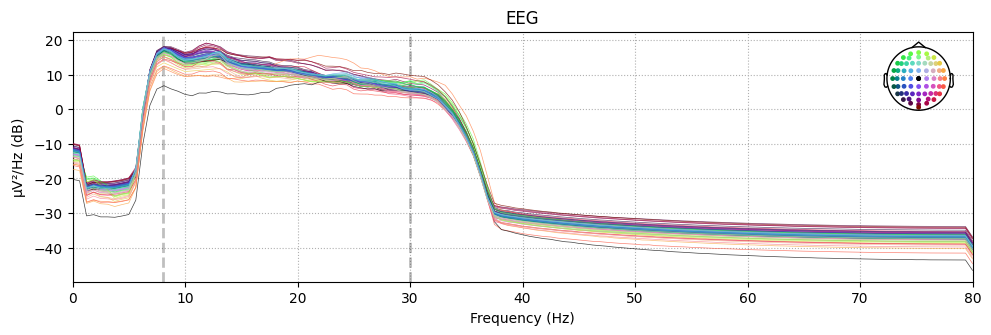

In [10]:
raw.compute_psd(picks='all').plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 62 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 7.7s.
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


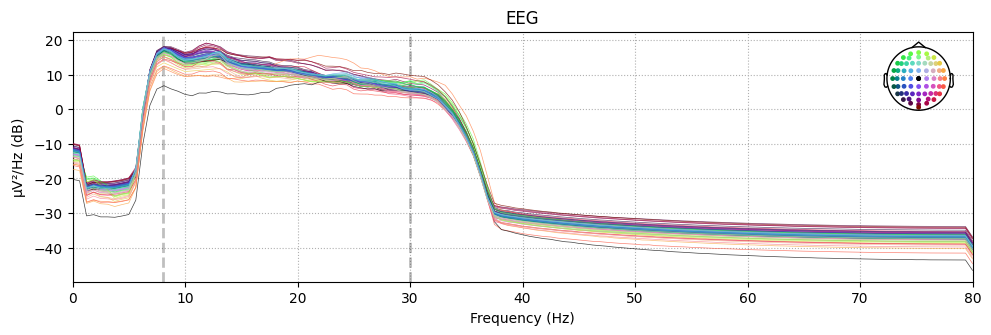

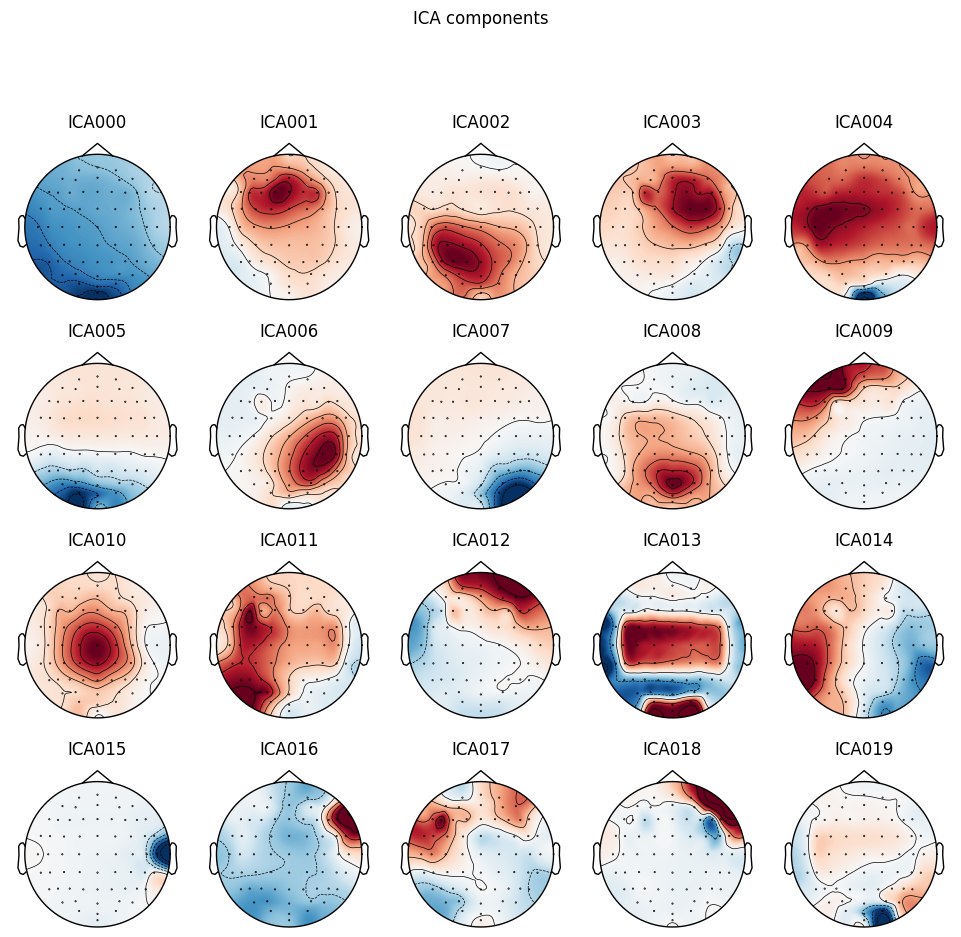

[<MNEFigure size 975x967 with 20 Axes>]

In [12]:
#ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
dir(ica)
raw_copy = raw.copy().filter(8,30)
raw_copy.drop_channels(['T9', 'T10'])
ica.fit(raw_copy)
print(raw.ch_names)
ica.plot_components(outlines='head', inst=raw)

In [ ]:
# Select channels
channels = raw.info["ch_names"]
good_channels = ["FC5", "FC3", "FC1", "FCz", "FC2", "FC4", "FC6",
                    "C5",  "C3",  "C1",  "Cz",  "C2",  "C4",  "C6",
                    "CP5", "CP3", "CP1", "CPz", "CP2", "CP4", "CP6"]
bad_channels = [x for x in channels if x not in good_channels]

print(bad_channels)

raw.drop_channels(bad_channels)
raw.compute_psd().plot_topomap()

In [ ]:
# Apply band-passfilter
raw.notch_filter(60, method="iir")
raw.compute_psd().plot()

raw.filter(7.0, 32.0, fir_design="firwin")
raw.compute_psd().plot()

raw.plot(scalings=dict(eeg=250e-6))
